In [1]:
# 코랩에서 구글 드라이브 접근
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd

# train.csv 파일을 불러옵니다.
df = pd.read_csv('/content/drive/MyDrive/졸업과제/severstal-steel-defect-detection/train.csv')

In [11]:
len(df)

7095

In [12]:
# ImageId를 기준으로 그룹화하고 각 그룹의 ClassID를 집계합니다.
# 이미지마다 여러 ClassID가 있을 경우, 그룹의 크기가 1보다 크면 같은 ImageId에 다른 ClassID가 있는 것입니다.
duplicate_image_ids = df.groupby('ImageId')['ClassId'].count().reset_index()
df_duplicates = duplicate_image_ids[duplicate_image_ids['ClassId'] > 1]

# 결과를 출력합니다.
print("같은 ImageId를 가지고 다른 ClassID를 가지는 경우:")
print(df_duplicates)

같은 ImageId를 가지고 다른 ClassID를 가지는 경우:
            ImageId  ClassId
5     0025bde0c.jpg        2
7     002fc4e19.jpg        2
16    008ef3d74.jpg        2
18    00ac8372f.jpg        2
22    00c88fed0.jpg        2
...             ...      ...
6587  fd26ab9ad.jpg        2
6605  fdb7c0397.jpg        2
6617  fe2234ba6.jpg        2
6651  ff6bfada2.jpg        2
6653  ff6e35e0a.jpg        2

[427 rows x 2 columns]


In [13]:
len(df_duplicates)

427

In [14]:
# ClassId가 1인 것만 선택합니다 (즉, 중복이 없는 경우).
non_duplicate_image_ids = duplicate_image_ids[duplicate_image_ids['ClassId'] == 1]

# 중복이 없는 ImageId들로 이루어진 새로운 데이터프레임을 생성합니다.
df_no_duplicates = df[df['ImageId'].isin(non_duplicate_image_ids['ImageId'])]


In [15]:
len(df_no_duplicates)

6239

In [16]:
df_no_duplicates

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [17]:
df_no_duplicates  = df_no_duplicates.reset_index(drop=True)

In [19]:
# 새로운 new_train.csv 파일로 저장합니다.
df_no_duplicates.to_csv('/content/drive/MyDrive/졸업과제/severstal-steel-defect-detection/new_train.csv', index=False)

In [25]:
class_counts_original = df['ClassId'].value_counts()
class_counts_original

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

In [26]:
class_counts_no_duplicates = df_no_duplicates['ClassId'].value_counts()
class_counts_no_duplicates

3    4759
1     769
4     516
2     195
Name: ClassId, dtype: int64

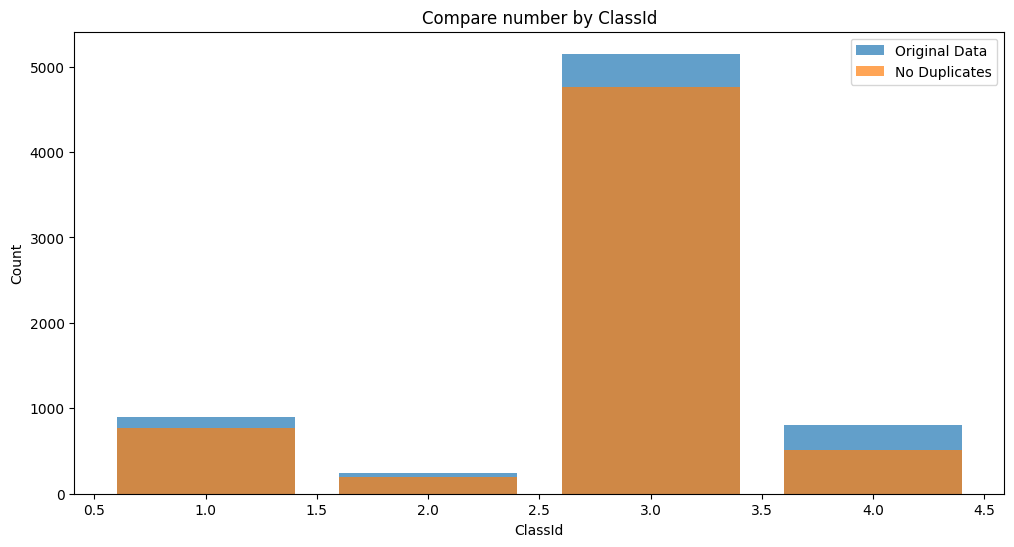

In [29]:
import matplotlib.pyplot as plt

# 그래프를 생성합니다.
plt.figure(figsize=(12, 6))

# 원본 데이터와 중복 제외 데이터를 겹쳐서 그립니다.
plt.bar(class_counts_original.index, class_counts_original.values, label='Original Data', alpha=0.7)
plt.bar(class_counts_no_duplicates.index, class_counts_no_duplicates.values, label='No Duplicates', alpha=0.7)

# 그래프 제목과 레이블을 추가합니다.
plt.title('Compare number by ClassId')
plt.xlabel('ClassId')
plt.ylabel('Count')
plt.legend()

# 그래프를 표시합니다.
plt.show()